In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'deltaEtaSC', 'dr03EcalRecHitSumEt', 'dr03HcalDepth1TowerSumEt', 'dr03TkSumPt', 'dr03TkSumPtHEEP', 'dxy', 'dxyErr', 'dz', 'dzErr', 'eCorr', 'eInvMinusPInv', 'energyErr', 'eta', 'hoe', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'mvaFall17V2Iso', 'mvaFall17V2noIso', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'scEtOverPt', 'sieie', 'sip3d', 'mvaTTH', 'charge', 'cutBased', 'jetIdx', 'pdgId', 'photonIdx', 'tightCharge', 'vidNestedWPBitmap', 'vidNestedWPBitmapHEEP', 'convVeto', 'cutBased_HEEP', 'isPFcand', 'jetNDauCharged', 'lostHits', 'mvaFall17V2Iso_WP80', 'mvaFall17V2Iso_WP90', 'mvaFall17V2Iso_WPL', 'mvaFall17V2noIso_WP80', 'mvaFall17V2noIso_WP90', 'mvaFall17V2noIso_WPL', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'genPartIdxG', 'jetIdxG', 'photonIdxG']


# Cut-based ID Variables
## Do we have the constituent variables for the IDs stored here. 
## Cross ref with regular nanoAOD and POG twikis

## cutBased

4mu cutBased structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0, 0], [], [], [], [0], [], []]
2mu2e cutBased structure: [[0, 0], [0, 0], [0], [2], [4, 0], [0], [4, ... [0], [2], [0], [4], [0], [0], [4, 0]]
4mu cutBased structure: [[0], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [], [], [], []]
2mu2e cutBased structure: [[0, 0], [4, 0], [4, 2], [4, 1, 0], [4, 4], ... 0], [4, 0], [4], [3], [0, 0], [3, 0]]
4mu cutBased structure: [[], [], [], [], [], [], [], [0], [], [], ... [], [], [], [], [0], [0], [], [], []]
2mu2e cutBased structure: [[], [0], [2], [], [4, 0], [], [1, 0, 0], ... [0], [1, 1], [0], [], [], [], [4, 3]]
4mu cutBased structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [], [], [0], []]
2mu2e cutBased structure: [[1], [], [0], [], [], [], [], [], [], ... [], [1, 2], [], [], [], [], [], [0]]
4mu cutBased structure: [[], [], [], [0], [], [], [], [], [], [], ... [], [], [], [], [0], [0, 0], [], []]
2mu2e cutBased structure:

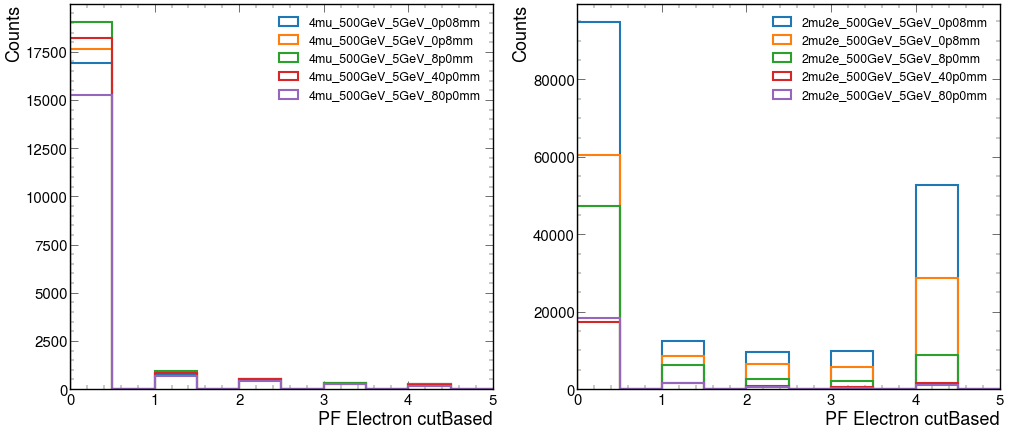

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("cutBased", events_4mu[i_4mu].cutBased, events_2mu2e[i_2mu].cutBased)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].cutBased), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].cutBased), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('PF Electron cutBased')
ax[1].set_xlabel('PF Electron cutBased')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/PF_ELECTRON/Cutbased_ID/cutBased.png", bbox_inches="tight")

## pdgId

4mu pdgId structure: [[], [], [], [], [], [], [], [], [], [], ... [], [11, 11], [], [], [], [11], [], []]
2mu2e pdgId structure: [[-11, 11], [11, -11], [11], [-11], [-11, ... [11], [-11], [11], [-11], [11, -11]]
4mu pdgId structure: [[11], [], [], [], [], [], [], [], [], ... [], [-11], [], [], [], [], [], [], []]
2mu2e pdgId structure: [[11, -11], [11, -11], [11, -11], [11, -11, ... [11], [-11], [-11, 11], [11, -11]]
4mu pdgId structure: [[], [], [], [], [], [], [], [-11], [], ... [], [], [], [11], [-11], [], [], []]
2mu2e pdgId structure: [[], [-11], [-11], [], [-11, -11], [], ... [11, -11], [11], [], [], [], [-11, 11]]
4mu pdgId structure: [[], [], [], [], [], [], [], [], [], [], ... [], [11], [], [], [], [], [], [11], []]
2mu2e pdgId structure: [[11], [], [11], [], [], [], [], [], [], ... [], [11, 11], [], [], [], [], [], [-11]]
4mu pdgId structure: [[], [], [], [-11], [], [], [], [], [], ... [], [], [], [], [11], [-11, -11], [], []]
2mu2e pdgId structure: [[], [], [], [], [], [], [

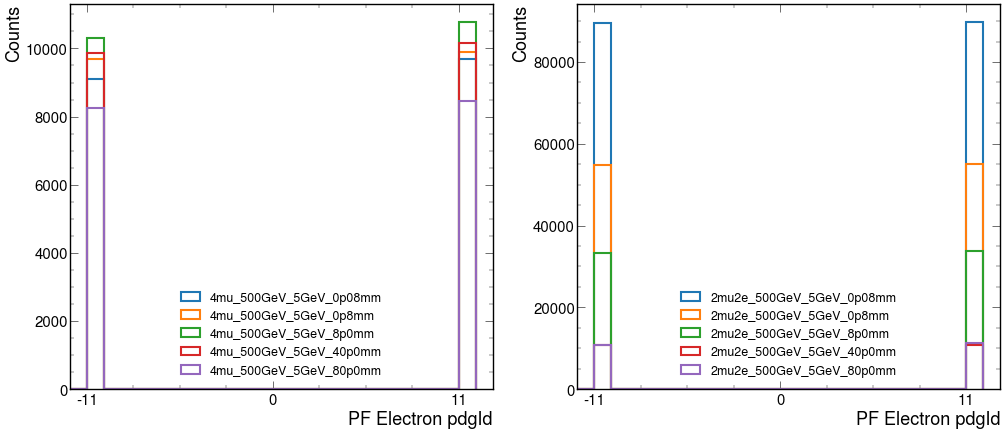

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pdgId", events_4mu[i_4mu].pdgId, events_2mu2e[i_2mu].pdgId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pdgId), range=(-12,12), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pdgId), range=(-12,12), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-12,13)
ax[1].set_xlim(-12,13)
ax[0].set_xlabel('PF Electron pdgId')
ax[1].set_xlabel('PF Electron pdgId')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_xticks([-11,0,11])
ax[1].set_xticks([-11,0,11])
plt.savefig("../Plots/V2/PF_ELECTRON/Cutbased_ID/pdgId.png", bbox_inches="tight")

## photonIdx

4mu photonIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-1, -1], [], [], [], [-1], [], []]
2mu2e photonIdx structure: [[0, 1], [0, 1], [0], [0], [0, 1], [0], [0, ... [1], [0], [0], [0], [0], [0], [0, 1]]
4mu photonIdx structure: [[-1], [], [], [], [], [], [], [], [], ... [], [-1], [], [], [], [], [], [], []]
2mu2e photonIdx structure: [[0, 1], [0, 1], [0, 1], [0, 1, -1], [0, 1, ... [0, 1], [0], [0], [0, 1], [0, 1]]
4mu photonIdx structure: [[], [], [], [], [], [], [], [-1], [], [], ... [], [], [], [], [0], [-1], [], [], []]
2mu2e photonIdx structure: [[], [1], [0], [], [0, 1], [], [0, 1, -1], ... [0], [0, 1], [2], [], [], [], [0, 1]]
4mu photonIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-1], [], [], [], [], [], [-1], []]
2mu2e photonIdx structure: [[0], [], [-1], [], [], [], [], [], [], ... [], [0, 1], [], [], [], [], [], [0]]
4mu photonIdx structure: [[], [], [], [-1], [], [], [], [], [], ... [], [], [], [], [-1], [0, -1], [], []]
2mu2e photonId

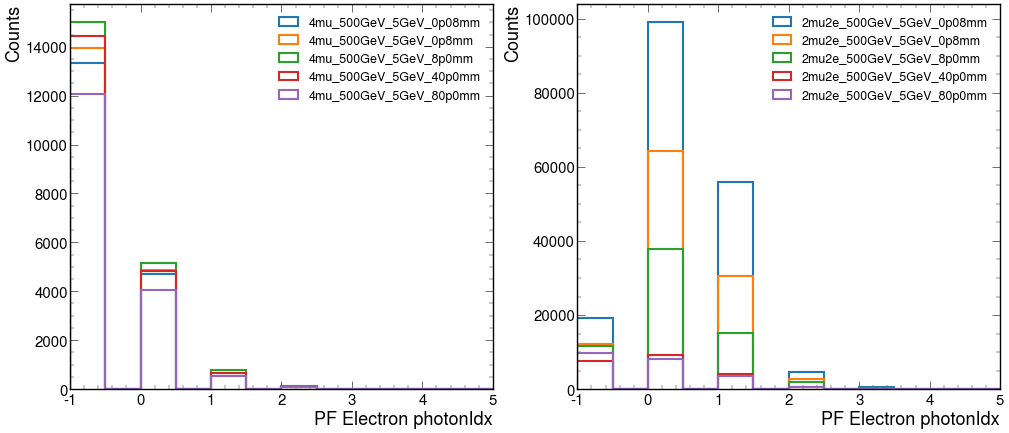

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("photonIdx", events_4mu[i_4mu].photonIdx, events_2mu2e[i_2mu].photonIdx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].photonIdx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].photonIdx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('PF Electron photonIdx')
ax[1].set_xlabel('PF Electron photonIdx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/PF_ELECTRON/Cutbased_ID/photonIdx.png", bbox_inches="tight")

## genPartIdx

4mu genPartIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-1, -1], [], [], [], [31], [], []]
2mu2e genPartIdx structure: [[8, 9], [9, 8], [-1], [8], [9, 10], [-1, ... [10], [9], [11], [13], [-1], [15, 11]]
4mu genPartIdx structure: [[-1], [], [], [], [], [], [], [], [], ... [], [-1], [], [], [], [], [], [], []]
2mu2e genPartIdx structure: [[9, 8], [12, 11], [14, 13], [12, 11, -1], ... [11, 9], [14], [8], [8, 9], [9, 8]]
4mu genPartIdx structure: [[], [], [], [], [], [], [], [35], [], ... [], [], [], [], [-1], [-1], [], [], []]
2mu2e genPartIdx structure: [[], [11], [-1], [], [13, 33], [], [10, -1, ... 8], [9, 8], [-1], [], [], [], [8, 9]]
4mu genPartIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-1], [], [], [], [], [], [-1], []]
2mu2e genPartIdx structure: [[-1], [], [-1], [], [], [], [], [], [], ... [], [-1, -1], [], [], [], [], [], [12]]
4mu genPartIdx structure: [[], [], [], [-1], [], [], [], [], [], ... [], [], [], [], [-1], [-1, -1], [], []]
2m

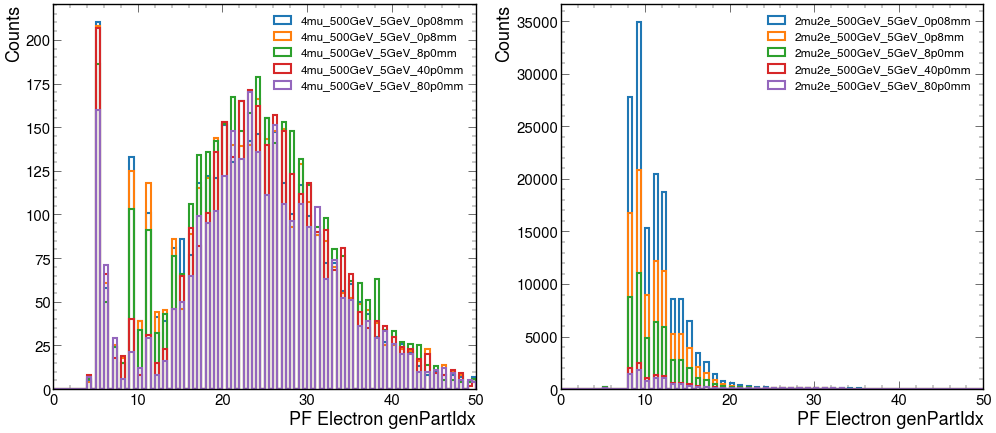

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("genPartIdx", events_4mu[i_4mu].genPartIdx, events_2mu2e[i_2mu].genPartIdx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].genPartIdx), range=(0,50), alpha=1, bins=100, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].genPartIdx), range=(0,50), alpha=1, bins=100, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,50)
ax[1].set_xlim(0,50)
ax[0].set_xlabel('PF Electron genPartIdx')
ax[1].set_xlabel('PF Electron genPartIdx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=17)
ax[1].legend(fontsize=17)
plt.savefig("../Plots/V2/PF_ELECTRON/Cutbased_ID/genPartIdx.png", bbox_inches="tight")

## genPartFlav

4mu genPartFlav structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0, 0], [], [], [], [4], [], []]
2mu2e genPartFlav structure: [[1, 1], [1, 1], [0], [1], [1, 1], [0], [1, ... [1], [1], [1], [1], [1], [0], [1, 1]]
4mu genPartFlav structure: [[0], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [], [], [], []]
2mu2e genPartFlav structure: [[1, 1], [1, 1], [1, 1], [1, 1, 0], [1, 1], ... 0], [1, 1], [1], [1], [1, 1], [1, 1]]
4mu genPartFlav structure: [[], [], [], [], [], [], [], [3], [], [], ... [], [], [], [], [0], [0], [], [], []]
2mu2e genPartFlav structure: [[], [1], [0], [], [1, 4], [], [1, 0, 0], ... [1], [1, 1], [0], [], [], [], [1, 1]]
4mu genPartFlav structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [], [], [0], []]
2mu2e genPartFlav structure: [[0], [], [0], [], [], [], [], [], [], ... [], [0, 0], [], [], [], [], [], [1]]
4mu genPartFlav structure: [[], [], [], [0], [], [], [], [], [], [], ... [], [], [], [], [0], [0, 0], [], []

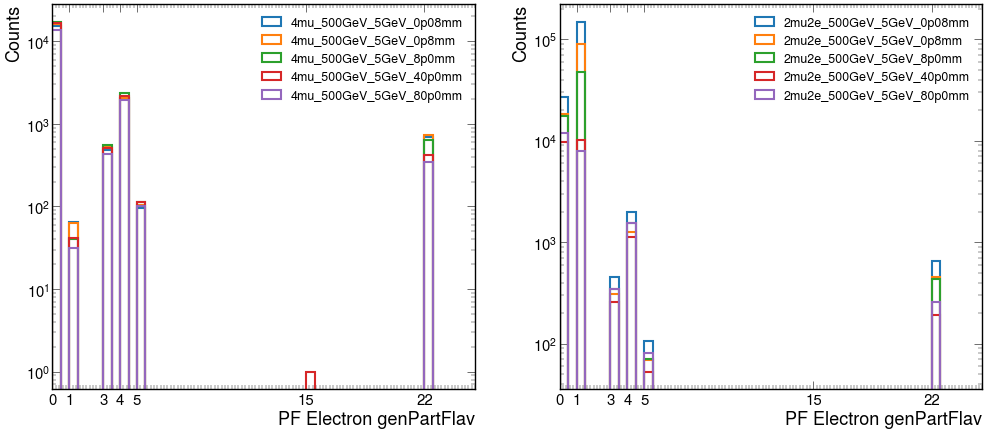

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("genPartFlav", events_4mu[i_4mu].genPartFlav, events_2mu2e[i_2mu].genPartFlav)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].genPartFlav), range=(0,25), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].genPartFlav), range=(0,25), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,25)
ax[1].set_xlim(0,25)
ax[0].set_xlabel('PF Electron genPartFlav')
ax[1].set_xlabel('PF Electron genPartFlav')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([0,1,3,4,5,15,22])
ax[1].set_xticks([0,1,3,4,5,15,22])
plt.savefig("../Plots/V2/PF_ELECTRON/Cutbased_ID/genPartFlav.png", bbox_inches="tight")